<a href="https://colab.research.google.com/github/alfie-agustin/Analisis-predictivo/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Hipotesis:***

1) La marca va a influenciar al precio

2) El tamaño de motor y caballos (cuanto mas) mas va a subir el precio

3) el tamaño del auto va a influenciar en el precio

4) el tipo de nafta va a influenciar en el precio








# Dataset y exploracion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as os
import scipy.stats as stats
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/2022/Analisis predictivo/pricepred/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
import random
random.seed(8)

In [ ]:
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().values.any()

False

In [ ]:
df[['Marca','Modelo']] = df.CarName.apply(lambda x: pd.Series(str(x).split(" ", 1)))

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [ ]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [ ]:
df.Marca.unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df.Modelo.unique() #chequear si hay repetidos y volarlos

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [ ]:
df.loc[df['Marca'] == "Nissan", 'Marca'] = 'nissan'
df.loc[df['Marca'] == "maxda", 'Marca'] = 'mazda'
df.loc[df['Marca'] == "vokswagen", 'Marca'] = 'volkswagen'
df.loc[df['Marca'] == "vw", 'Marca'] = 'volkswagen'
df.loc[df['Marca'] == "porcshce", 'Marca'] = 'porsche'
df.loc[df['Marca'] == "toyouta", 'Marca'] = 'toyota'


In [ ]:
df.Marca.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#DISTRIBUCION DE VARIABLES



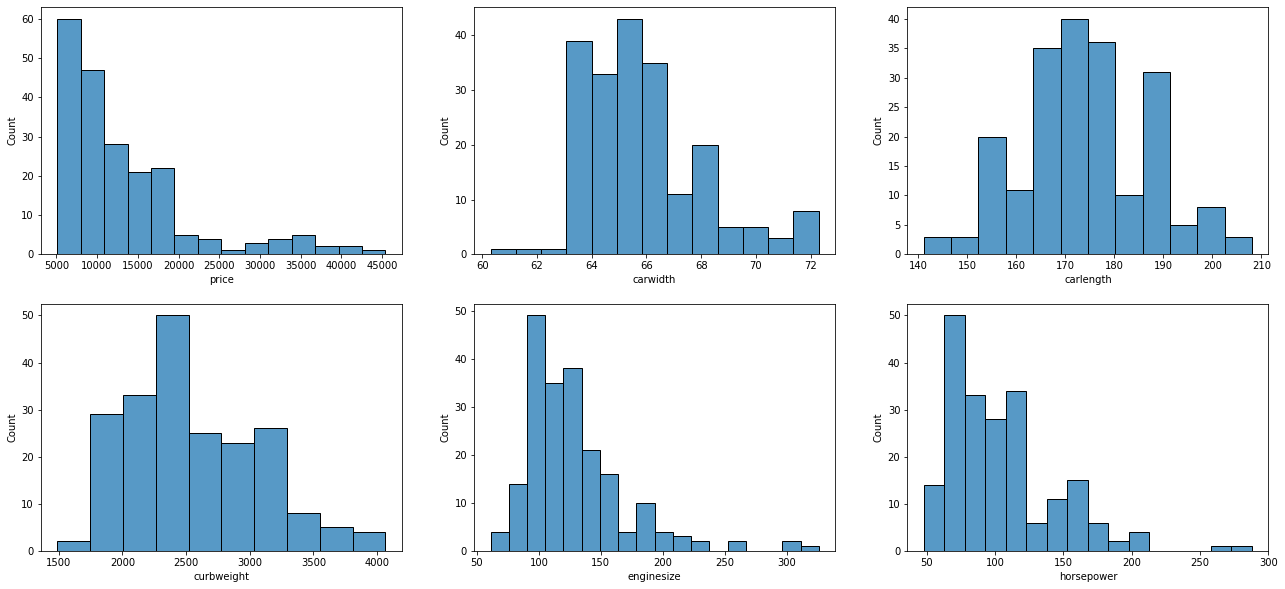

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.histplot(data=df, x="price", ax=axs[0,0],multiple="stack")
sns.histplot(data=df, x="carwidth",  ax=axs[0,1],multiple="stack")
sns.histplot(data=df, x="curbweight",  ax=axs[1,0],multiple="stack")
sns.histplot(data=df, x="enginesize", ax=axs[1,1],multiple="stack")
sns.histplot(data=df, x="horsepower", ax=axs[1,2],multiple="stack")
sns.histplot(data = df, x ="carlength" , ax = axs[0,2], multiple = "stack")
plt.show()

#TEST DE NORMALIDAD PARA VARIABLE RESPUESTA


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


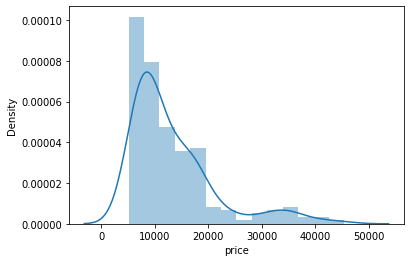

In [ ]:
sns.distplot(df.price) 

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df.price)

print('stat: ', stat)
print('p value:', p)

if p > 0.05:
  print('probability gaussin')
else:
  print('probability not gaussian')  



stat:  0.8006654381752014
p value: 1.8491777441833604e-15
probability not gaussian


#CORRELACIONES




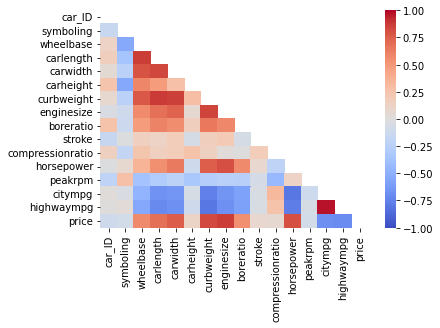

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = False
            , cmap = 'coolwarm', mask = mask)

#se puede ver una posible relacioin entre el precio con el ancho del auto, el peso, el tamaño de motor y los caballos de fuerza

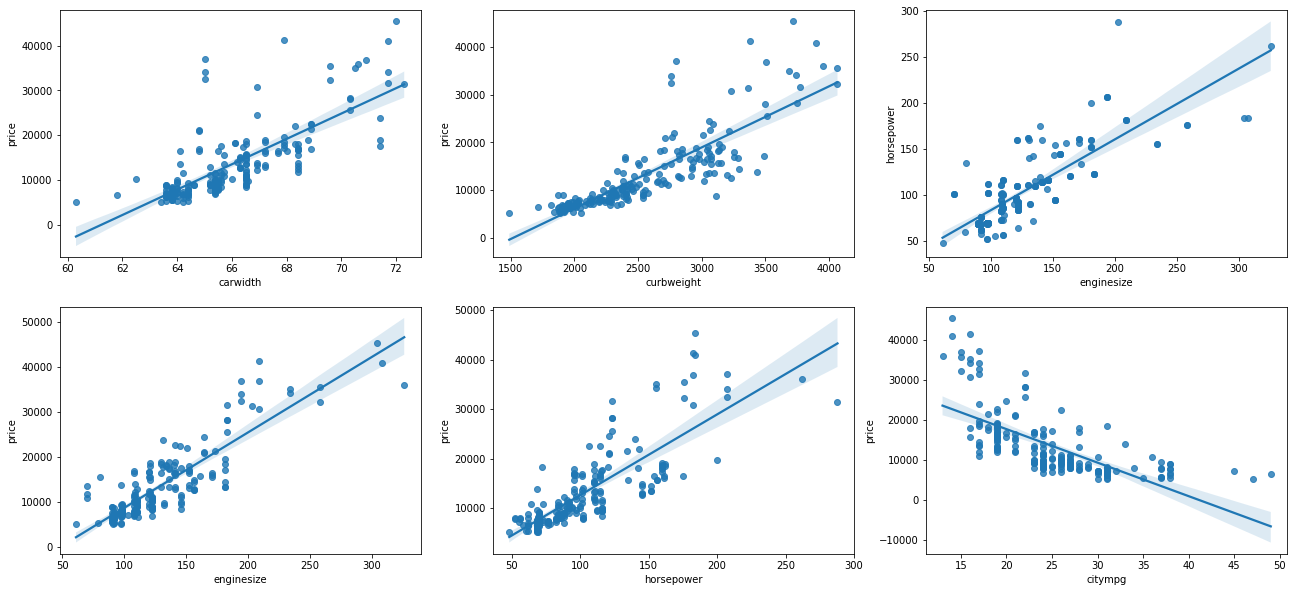

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))


sns.regplot(x = df.carwidth, y = df.price, ax=axs[0,0], )
sns.regplot(x = df.curbweight, y = df.price, ax=axs[0,1])
sns.regplot(x = df.enginesize, y = df.horsepower, ax=axs[0, 2])

sns.regplot(x = df.enginesize, y = df.price, ax = axs[1,0])
sns.regplot(x = df.horsepower, y = df.price, ax = axs[1,1])
sns.regplot( x= df.citympg, y = df.price, ax = axs[1,2])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

print("El coeficiente de correlacion para el carwidth vs precio es de ", np.corrcoef(x = df.carwidth, y = df.price)[0,1])
print("El coeficiente de correlacion para el curbweight vs precio es de ",np.corrcoef(x = df.curbweight, y = df.price)[0,1] )
print("El coeficiente de correlacion para el enginesize vs precio es de ", np.corrcoef(x = df.enginesize, y = df.price)[0,1])
print("El coeficiente de correlacion para el horsepower vs precio  es de ", np.corrcoef(x = df.horsepower, y = df.price)[0,1])
print("El coeficiente de correlacion para el citympg vs precio es de ",np.corrcoef(x = df.citympg, y = df.price)[0,1] )
print("El coeficiente de correlacion para el enginesize vs horsepower es de ",np.corrcoef(x = df.enginesize, y = df.price)[0,1] )



El coeficiente de correlacion para el carwidth vs precio es de  0.7593252997415118
El coeficiente de correlacion para el curbweight vs precio es de  0.8353048793372965
El coeficiente de correlacion para el enginesize vs precio es de  0.8741448025245112
El coeficiente de correlacion para el horsepower vs precio  es de  0.8081388225362212
El coeficiente de correlacion para el citympg vs precio es de  -0.6857513360270401
El coeficiente de correlacion para el enginesize vs horsepower es de  0.8741448025245112


***SCATTER PLOTS PARA ENTENDER MEJOR EL TIPO DE CORR***

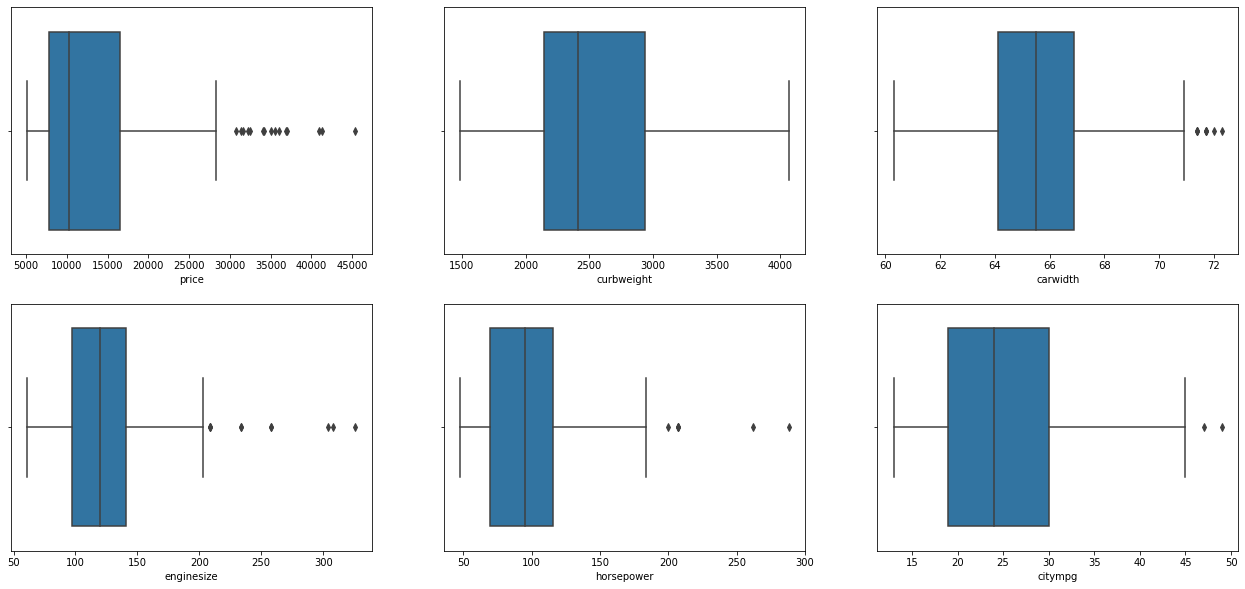

In [ ]:
#ANALISIS OUTLIERS

fig, axs = plt.subplots(2,3, figsize=(22, 10))



sns.boxplot(x=df.price, ax=axs[0,0]) 
sns.boxplot(x=df.carwidth, ax=axs[0,2])
sns.boxplot(x=df.curbweight, ax=axs[0,1])
sns.boxplot(x=df.enginesize, ax = axs[1,0])
sns.boxplot(x=df.horsepower, ax = axs[1,1])
sns.boxplot(x=df.citympg, ax = axs[1,2])

plt.show()




In [ ]:
np.percentile(df.price, 25)

7788.0

In [ ]:
print("En la variable precio el primer cuartil es ",np.percentile(df.price, 25),", el tercer cuartil es ",np.percentile(df.price, 75)," y la mediana es ", np.median(df.price))
print("En la variable curbweight el primer cuartil es ", np.percentile(df.curbweight, 25),", el tercer cuartil es ", np.percentile(df.curbweight, 75), " la mediana es", np.median(df.curbweight))
print("En la variable carwidth el primer cuartil es ",np.percentile(df.carwidth, 25) ,", el tercer cuartil es ",np.percentile(df.carwidth, 75) , " y la mediana es", np.median(df.carwidth))
print("En la variable enginesize el primer cuartil es ", np.percentile(df.enginesize, 25),", el tercer cuartil es ", np.percentile(df.enginesize, 75), " y la mediana es", np.median(df.enginesize))
print("En la variable horsepower el primer cuartil es ", np.percentile(df.horsepower, 25),", el tercer cuartil es ",np.percentile(df.horsepower, 75) , " y la mediana es", np.median(df.horsepower))
print("En la variable citympg el primer cuartil es ",np.percentile(df.citympg, 25) ,", el tercer cuartil es ",np.percentile(df.citympg, 75) , " y la mediana es", np.median(df.citympg))

En la variable precio el primer cuartil es  7788.0 , el tercer cuartil es  16503.0  y la mediana es  10295.0
En la variable curbweight el primer cuartil es  2145.0 , el tercer cuartil es  2935.0  la mediana es 2414.0
En la variable carwidth el primer cuartil es  64.1 , el tercer cuartil es  66.9  y la mediana es 65.5
En la variable enginesize el primer cuartil es  97.0 , el tercer cuartil es  141.0  y la mediana es 120.0
En la variable horsepower el primer cuartil es  70.0 , el tercer cuartil es  116.0  y la mediana es 95.0
En la variable citympg el primer cuartil es  19.0 , el tercer cuartil es  30.0  y la mediana es 24.0


CATEGORICAS VS PRECIO, H

<BarContainer object of 205 artists>

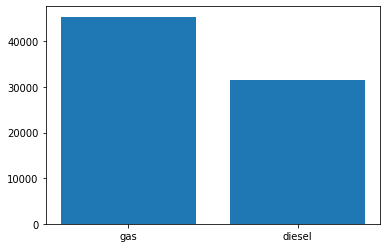

In [ ]:
plt.bar(df.fueltype, df.price, )

#los autos que usan diesel valen un 25% menos

<BarContainer object of 205 artists>

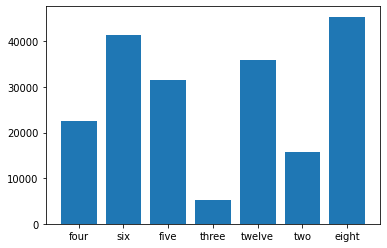

In [ ]:
plt.bar(df.cylindernumber, df.price)
# no se ve una relacion constante


#Marca influencia en el precio



             count          mean
Marca                           
alfa-romero      3  15498.333333
audi             7  17859.166714
bmw              8  26118.750000
buick            8  33647.000000
chevrolet        3   6007.000000
dodge            9   7875.444444
honda           13   8184.692308
isuzu            4   8916.500000
jaguar           3  34600.000000
mazda           17  10652.882353
mercury          1  16503.000000
mitsubishi      13   9239.769231
nissan          18  10415.666667
peugeot         11  15489.090909
plymouth         7   7963.428571
porsche          5  31400.500000
renault          2   9595.000000
saab             6  15223.333333
subaru          12   8541.250000
toyota          32   9885.812500
volkswagen      12  10077.500000
volvo           11  18063.181818


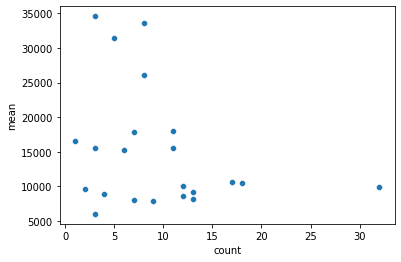

In [ ]:
df2 = df.groupby('Marca', sort=True)['price'].agg(['count','mean'])

print(df2)

sns.scatterplot(x = df2['count'], y = df2['mean'])

#Dummisar variable

In [ ]:
import numpy as np
import pandas as pd

df['nissan'] = np.where(df['Marca']=='nissan', 1, 0)
df['mazda'] = np.where(df['Marca']=='mazda', 1, 0)
df['volkswagen'] = np.where(df['Marca']=='volkswagen', 1, 0)
df['porsche'] = np.where(df['Marca']=='porsche', 1, 0)
df['toyota'] = np.where(df['Marca']=='toyota', 1, 0)
df['alfa-romeo'] = np.where(df['Marca']=='alfa-romero', 1, 0)
df['audi'] = np.where(df['Marca']=='audi', 1, 0)
df['bmw'] = np.where(df['Marca']=='bmw', 1, 0)
df['chevrolet'] = np.where(df['Marca']=='chevrolet', 1, 0)
df['dodge'] = np.where(df['Marca']=='dodge', 1, 0)
df['honda'] = np.where(df['Marca']=='honda', 1, 0)
df['isuzu'] = np.where(df['Marca']=='isuzu', 1, 0)
df['jaguar'] = np.where(df['Marca']=='jaguar', 1, 0)
df['buick'] = np.where(df['Marca']=='buick', 1, 0)
df['mercury'] = np.where(df['Marca']=='mercury', 1, 0)
df['mitsubishi'] = np.where(df['Marca']=='mitsubishi', 1, 0)
df['peugot'] = np.where(df['Marca']=='peugot', 1, 0)
df['plymouth'] = np.where(df['Marca']=='plymouth', 1, 0)
df['renault'] = np.where(df['Marca']=='renault', 1, 0)
df['saab'] = np.where(df['Marca']=='saab', 1, 0)
df['subaru'] = np.where(df['Marca']=='subaru', 1, 0)
df['volvo'] = np.where(df['Marca']=='volvo', 1, 0)


df.drop(columns=['Marca'],axis=1,inplace=True)

In [ ]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['convertible'] = np.where(df['carbody']=='convertible', 1, 0)
df['hatchback'] = np.where(df['carbody']=='hatchback', 1, 0)
df['sedan'] = np.where(df['carbody']=='sedan', 1, 0)
df['wagon'] = np.where(df['carbody']=='wagon', 1, 0)
df['hardtop'] = np.where(df['carbody']=='hardtop', 1, 0)


df.drop(columns=['carbody'],axis=1,inplace=True)

In [ ]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['rwd'] = np.where(df['drivewheel']=='rwd', 1, 0)
df['fwd'] = np.where(df['drivewheel']=='fwd', 1, 0)
df['4wd'] = np.where(df['drivewheel']=='4wd', 1, 0)


df.drop(columns=['drivewheel'],axis=1,inplace=True)

In [ ]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [ ]:
df['two'] = np.where(df['doornumber']=='two', 1, 0)
df['four'] = np.where(df['doornumber']=='four', 1, 0)

df.drop(columns=['doornumber'],axis=1,inplace=True)

In [ ]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['front'] = np.where(df['enginelocation']=='front', 1, 0)
df['rear'] = np.where(df['enginelocation']=='rear', 1, 0)

df.drop(columns=['enginelocation'],axis=1,inplace=True)

In [ ]:
df['gas'] = np.where(df['fueltype']=='front', 1, 0)
df['diesel'] = np.where(df['fueltype']=='rear', 1, 0)

df.drop(columns=['fueltype'],axis=1,inplace=True)

#Regresion lineal

- no es robusta a outliers


In [ ]:
df_regresion = df[[
"wheelbase",
"carlength",
"carwidth",
"carheight",
"curbweight",
"enginesize",
"boreratio",
"stroke",
"compressionratio",
"horsepower",
"peakrpm",
"citympg",
"highwaympg",
'alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop','rwd', 'fwd', '4wd','two', 'four', 'front', 'rear', 'gas', 'diesel',
"price"]]

In [ ]:
from sklearn.model_selection import train_test_split

x = df_regresion.drop(columns = ['price']).copy()
y = df_regresion['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)




(164, 49)
(164,)
(41, 49)
(41,)


(None, None)

In [ ]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

regresion.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred = regresion.predict(x_test)

In [ ]:
print("Datos del modelo lineal simple ")

print("Valor de la pendiente o del coef 'a': ", regresion.coef_)

print("Valor de la interseccion o del coef 'b':", regresion.intercept_)

print("Presicion del modelo: ", regresion.score(x_train, y_train))

print("El score es: ", regresion.score(x_test, y_test))

Datos del modelo lineal simple 
Valor de la pendiente o del coef 'a':  [ 2.63018925e+02 -1.12272685e+02  3.21495288e+02 -3.96639727e+02
  5.01718126e+00  4.44341275e+01 -2.28427477e+03  3.15210227e+02
  4.52587567e+01  3.87509131e+01  9.52017657e-01 -1.01782167e+01
  7.75489167e+01  8.22727911e+02  1.64624186e+03  1.04824581e+04
 -2.66855284e+02 -1.87923323e+03 -9.52894489e+02  1.52183932e+02
  4.71119430e+03  2.10914182e+03  7.72321053e+03  1.21582272e+03
 -2.45090521e+03 -8.15169113e+02  3.63797881e-12 -1.88079929e+03
  5.41556577e+03 -1.08136491e+03  4.03051954e+03  3.69000059e+02
 -5.00113176e+02  2.17100395e+02  1.82337599e+03  3.09596589e+03
 -9.51989585e+02 -7.66695146e+00  2.18065410e+02 -2.35437476e+03
 -4.48802194e+02 -1.57595528e+02  6.06397722e+02 -7.28893368e+01
  7.28893368e+01 -5.41556577e+03  5.41556577e+03  0.00000000e+00
  0.00000000e+00]
Valor de la interseccion o del coef 'b': -11673.023604277876
Presicion del modelo:  0.9498566584557729
El score es:  0.925142897943

[Text(0.5, 1.0, 'y_test vs y_pred')]

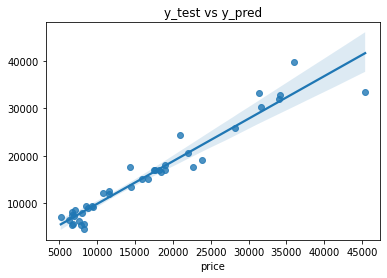

In [ ]:
sns.regplot(x = y_test, y = pred).set(title = "y_test vs y_pred")

#Arbol regresion

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html



In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b448bbc1ed2e5c333d355d2f0e3e405999e49066e79cc6d5d1f7f2fe81a6fdd4
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
base_arbol = df[[
"wheelbase", #esto
"carlength",
"carwidth",
"carheight", #esto
"curbweight", #esto
"enginesize",
"boreratio",
"stroke", #esto
"compressionratio",
"horsepower",
"peakrpm",
"citympg", #esto
"highwaympg",
'alfa-romeo', 
'audi', #esto
'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop','rwd', 'fwd', '4wd','two', 'four', 'front', 'rear', 'gas', 'diesel',
"price"]]

In [ ]:
from sklearn.model_selection import train_test_split

x1 = base_arbol.drop(columns = ['price']).copy()
y1 = base_arbol['price']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20 )

print(x_train1.shape), print(y_train1.shape)
print(x_test1.shape), print(y_test1.shape)

(164, 49)
(164,)
(41, 49)
(41,)


(None, None)

In [ ]:
x_train1.dtypes

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
alfa-romeo            int64
audi                  int64
bmw                   int64
chevrolet             int64
dodge                 int64
honda                 int64
isuzu                 int64
jaguar                int64
mazda                 int64
buick                 int64
mercury               int64
mitsubishi            int64
nissan                int64
peugot                int64
plymouth              int64
porsche               int64
renault               int64
saab                  int64
subaru                int64
toyota                int64
volkswagen            int64
volvo                 int64
convertible         

[Text(0.5, 0.875, 'X[5] <= 182.0\nsamples = 164\nvalue = 13740.998'),
 Text(0.25, 0.625, 'X[4] <= 2620.0\nsamples = 148\nvalue = 11479.515'),
 Text(0.125, 0.375, 'X[4] <= 2291.5\nsamples = 97\nvalue = 8774.258'),
 Text(0.0625, 0.125, 'samples = 58\nvalue = 7417.793'),
 Text(0.1875, 0.125, 'samples = 39\nvalue = 10791.564'),
 Text(0.375, 0.375, 'X[2] <= 68.6\nsamples = 51\nvalue = 16624.807'),
 Text(0.3125, 0.125, 'samples = 43\nvalue = 15927.678'),
 Text(0.4375, 0.125, 'samples = 8\nvalue = 20371.875'),
 Text(0.75, 0.625, 'X[12] <= 16.5\nsamples = 16\nvalue = 34659.719'),
 Text(0.625, 0.375, 'X[37] <= 0.5\nsamples = 2\nvalue = 43180.0'),
 Text(0.5625, 0.125, 'samples = 1\nvalue = 45400.0'),
 Text(0.6875, 0.125, 'samples = 1\nvalue = 40960.0'),
 Text(0.875, 0.375, 'X[3] <= 56.4\nsamples = 14\nvalue = 33442.536'),
 Text(0.8125, 0.125, 'samples = 12\nvalue = 34532.958'),
 Text(0.9375, 0.125, 'samples = 2\nvalue = 26900.0')]

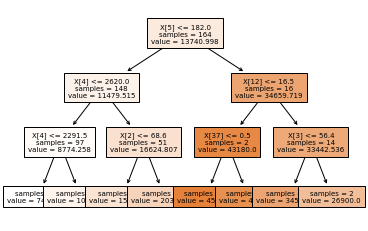

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


arbol = DecisionTreeRegressor(
    max_depth= 3
)
arbol.fit(x_train1, y_train1)

tree.plot_tree(decision_tree = arbol,   
            filled        = True,
            impurity      = False,
            fontsize      = 7)

In [ ]:
#Prediccion y score
pred_arbol = arbol.predict(x_test1)

In [ ]:
print(x_train1.shape)
print(y_train1.shape)

(164, 47)
(164,)


In [ ]:
from sklearn import metrics
R2_arbol = metrics.r2_score(y_test1, pred_arbol)
MSE_arbol = metrics.mean_squared_error(y_test1, pred_arbol)


print("R2: ", R2_arbol)
print("MSE: ", MSE_arbol) 


R2:  0.8476177439018051
MSE:  7992859.038016996


[Text(0.5, 1.0, 'y_test vs y_pred')]

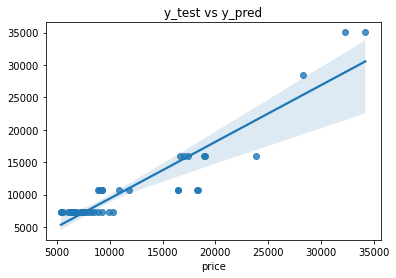

In [ ]:
sns.regplot(x = y_test1, y = pred_arbol).set(title = "y_test vs y_pred")